In [70]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras
import numpy as np
from tensorflow.keras.optimizers import Adam
import torch
from torch import nn
from torchvision import transforms
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import seaborn as sns
labels_list=[0,1,2,3,4,5,6,7,8,9]

In [3]:
# downloading the dataset and normalizing it
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Reshaping data to match CNN input format (28x28), 1 is grayscale channel
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [5]:
convolutional_neural_network = models.Sequential([
    #kernel_size = filter size
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),

    #larger filter size to capture broader patterns
    layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #smaller filter size to capture fine details
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    # Fully Connected Layer: 64 units
    layers.Dense(64, activation='relu'),
    # Output Layer: 10 units (for 10 classes), softmax activation for multi-class classification
    layers.Dense(10, activation='softmax')
])

In [6]:
learning_rate = 0.001
batch_size = 64

optimizer = Adam(learning_rate=learning_rate)
convolutional_neural_network.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn_history = convolutional_neural_network.fit(X_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
938/938 [==============================] - 36s 36ms/step - loss: 0.2190 - accuracy: 0.9330
Epoch 2/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0561 - accuracy: 0.9832
Epoch 3/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0375 - accuracy: 0.9883
Epoch 4/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0294 - accuracy: 0.9910
Epoch 5/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0231 - accuracy: 0.9926
Epoch 6/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0198 - accuracy: 0.9937
Epoch 7/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 8/10
938/938 [==============================] - 31s 33ms/step - loss: 0.0135 - accuracy: 0.9956
Epoch 9/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 10/10
938/938 [==============================] - 32s 34ms/step - loss: 0.008

In [57]:
cnn = convolutional_neural_network.evaluate(X_test, y_test)
#loss: cnn[0], accuracy: cnn[1]

313/313 [==============================] - 2s 6ms/step - loss: 18.4674 - accuracy: 0.9784


In [58]:
y_predicted_by_model = convolutional_neural_network.predict(X_test)
cnn_predicted_labels = [np.argmax(i) for i in y_predicted_by_model]

313/313 [==============================] - 2s 6ms/step


In [59]:
#calculating performance metrics of cnn
cnn_cf = confusion_matrix(y_test,cnn_predicted_labels)
cnn_precision = precision_score(y_test,cnn_predicted_labels, average='weighted')
cnn_recall = recall_score(y_test,cnn_predicted_labels, average='weighted')

In [62]:
#classification report
print(classification_report(y_test, cnn_predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.95      0.97      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.96      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.96      0.98      1028
           8       0.89      1.00      0.94       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [66]:
# Print accuracy of each class
cnn_predicted_labels_np = np.array(cnn_predicted_labels)
class_accuracies = {}
for cls in labels_list:
    idx = np.where(y_test == cls) # Extract indices from the tuple
    true_labels = y_test[idx]
    pred_labels = cnn_predicted_labels_np[idx]
    accuracy = accuracy_score(true_labels, pred_labels)
    class_accuracies[cls] = accuracy

for cls, accuracy in class_accuracies.items():
    print(f"Accuracy for class {cls}: {accuracy}")

Accuracy for class 0: 0.9928571428571429
Accuracy for class 1: 0.9480176211453745
Accuracy for class 2: 0.9893410852713178
Accuracy for class 3: 0.9762376237623762
Accuracy for class 4: 0.9928716904276986
Accuracy for class 5: 0.9618834080717489
Accuracy for class 6: 0.9864300626304802
Accuracy for class 7: 0.9620622568093385
Accuracy for class 8: 0.9969199178644764
Accuracy for class 9: 0.981169474727453


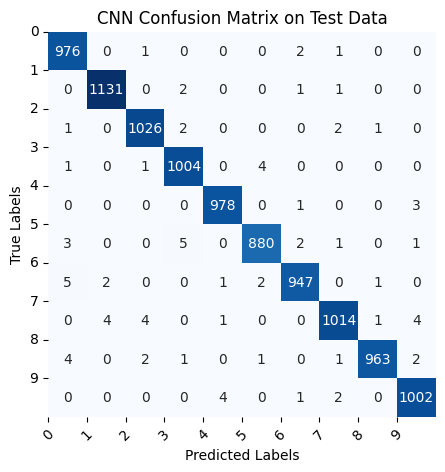

In [10]:
# plot cnn confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cnn_cf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CNN Confusion Matrix on Test Data')
plt.xticks(ticks=np.arange(len(labels_list)), labels=labels_list, rotation=45)
plt.yticks(ticks=np.arange(len(labels_list)), labels=labels_list, rotation=0)
plt.show()

# LSTM

In [12]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train))
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test).float(), torch.tensor(y_test))
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=64,shuffle=False)

In [13]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers,num_classes):
        super(LSTM, self).__init__()
        #input parameter
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Define the LSTM layer
        # LSTM is better than simple RNN as it remembers long term dependencies and reduces vanishing gradient problem
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,batch_first=True)

        # define fully connected linear layer for classification of LSTM's learned features
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Initialize hidden and cell states
        h = torch.zeros(self.num_layers, x.size(0),self.hidden_size).to(device)
        c = torch.zeros(self.num_layers, x.size(0),self.hidden_size).to(device)

        out, _ = self.lstm(x, (h, c))

        out = self.fc(out[:, -1, :])
        return out

In [14]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [15]:
device = get_default_device()

In [16]:
# Hyper parameters
learning_rate = 0.001
sequence_length = 28
hidden_size = 128
num_classes = 10
batch_size = 64
input_size = 28
num_layers = 2
num_epochs = 10
model = LSTM(input_size, hidden_size, num_layers, num_classes)
to_device(model, device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
lstm_accuracy_history = []
lstm_loss_history = []
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    correct=0
    total=0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the correct predictions
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    lstm_accuracy_history.append(accuracy)
    lstm_loss_history.append(loss.item())
    print ('Epoch [{}/{}], Accuracy: {:.2f}%, Loss: {:.4f}'.format(epoch+1, num_epochs, accuracy, loss.item()))

Epoch [1/10], Accuracy: 89.83%, Loss: 0.1430
Epoch [2/10], Accuracy: 96.87%, Loss: 0.1493
Epoch [3/10], Accuracy: 97.67%, Loss: 0.0110
Epoch [4/10], Accuracy: 98.07%, Loss: 0.1676
Epoch [5/10], Accuracy: 98.39%, Loss: 0.0292
Epoch [6/10], Accuracy: 98.53%, Loss: 0.0724
Epoch [7/10], Accuracy: 98.71%, Loss: 0.0149
Epoch [8/10], Accuracy: 98.74%, Loss: 0.0012
Epoch [9/10], Accuracy: 98.94%, Loss: 0.0396
Epoch [10/10], Accuracy: 98.98%, Loss: 0.0015


In [18]:
model.eval()
with torch.no_grad():
    all_images = torch.cat([images for images, _ in test_loader], dim=0)
    all_images = all_images.reshape(-1, sequence_length, input_size).to(device)

    # Perform inference on all images
    outputs = model(all_images)
    _, all_predicted = torch.max(outputs, 1)

    # Calculate the loss
    lstm_loss = criterion(outputs, torch.tensor(y_test).to(device)).item()


# Convert the tensor of predicted labels to a NumPy array
lstm_predicted = all_predicted.cpu().numpy()

In [19]:
#calculating performance metrics of cnn
lstm_cf = confusion_matrix(y_test,lstm_predicted)
lstm_accuracy = accuracy_score(y_test,lstm_predicted)
lstm_precision = precision_score(y_test,lstm_predicted, average='weighted')
lstm_recall = recall_score(y_test,lstm_predicted, average='weighted')

In [37]:
#classification report
print(classification_report(y_test, lstm_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [52]:
#print accuracy of each class
class_accuracies = {}
for cls in labels_list:
    idx = np.where(y_test == cls)
    true_labels = y_test[idx]
    pred_labels = lstm_predicted[idx]
    accuracy = accuracy_score(true_labels, pred_labels)
    class_accuracies[cls] = accuracy

for cls, accuracy in class_accuracies.items():
    print(f"Accuracy for class {cls}: {accuracy}")

Accuracy for class 0: 0.9989795918367347
Accuracy for class 1: 0.9903083700440528
Accuracy for class 2: 0.9796511627906976
Accuracy for class 3: 0.9811881188118812
Accuracy for class 4: 0.9765784114052953
Accuracy for class 5: 0.9697309417040358
Accuracy for class 6: 0.9895615866388309
Accuracy for class 7: 0.980544747081712
Accuracy for class 8: 0.9856262833675564
Accuracy for class 9: 0.9841427155599604


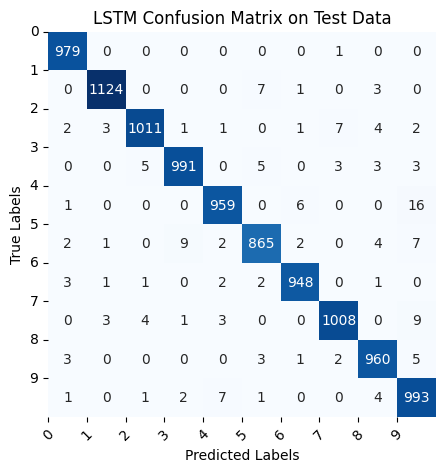

In [20]:
# plot lstm confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(lstm_cf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('LSTM Confusion Matrix on Test Data')
plt.xticks(ticks=np.arange(len(labels_list)), labels=labels_list, rotation=45)
plt.yticks(ticks=np.arange(len(labels_list)), labels=labels_list, rotation=0)
plt.show()

# MLP

In [21]:
# load the dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
# Flatten the input images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define the architecture of the MLP
# 4 hidden layers with 128, 64, 32 and 16 neurons respectively
# 784 (28x28) neurons in input layer
# 10 neurons in output layer (0-9: ten labels)
mlp = models.Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=(784,)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(10, activation='softmax')  # softmax for classification
])

In [22]:
learning_rate = 0.001
batch_size = 64

optimizer = Adam(learning_rate=learning_rate)
mlp.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
mlp_history = mlp.fit(X_train_flat, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 1.3126 - accuracy: 0.6733
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5344 - accuracy: 0.8693
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.4134 - accuracy: 0.8862
Epoch 4/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3692 - accuracy: 0.8936
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3346 - accuracy: 0.9016
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2981 - accuracy: 0.9113
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2776 - accuracy: 0.9193
Epoch 8/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2739 - accuracy: 0.9183
Epoch 9/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2687 - accuracy: 0.9190
Epoch 10/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2668 - accuracy: 0.9197

In [24]:
mlptest = mlp.evaluate(X_test_flat, y_test)
#loss: mlptest[0], accuracy: mlptest[1]

313/313 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy: 0.9238


In [25]:
y_predicted_by_mlp = mlp.predict(X_test_flat)
mlp_predictions = [np.argmax(i) for i in y_predicted_by_mlp]

313/313 [==============================] - 0s 1ms/step


In [26]:
#calculating performance metrics of mlp
mlp_cf = confusion_matrix(y_test,mlp_predictions)
mlp_accuracy = accuracy_score(y_test,mlp_predictions)
mlp_precision = precision_score(y_test,mlp_predictions, average='weighted')
mlp_recall = recall_score(y_test,mlp_predictions, average='weighted')

In [69]:
#classification report
print(classification_report(y_test,mlp_predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.98      0.96      0.97      1135
           2       0.92      0.91      0.92      1032
           3       0.90      0.93      0.92      1010
           4       0.91      0.93      0.92       982
           5       0.90      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.94      0.93      1028
           8       0.90      0.89      0.89       974
           9       0.93      0.86      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [68]:
# Print accuracy of each class
mlp_predictions_np = np.array(mlp_predictions)
class_accuracies = {}
for cls in labels_list:
    idx = np.where(y_test == cls) # Extract indices from the tuple
    true_labels = y_test[idx]
    pred_labels = mlp_predictions_np[idx]
    accuracy = accuracy_score(true_labels, pred_labels)
    class_accuracies[cls] = accuracy

for cls, accuracy in class_accuracies.items():
    print(f"Accuracy for class {cls}: {accuracy}")

Accuracy for class 0: 0.9785714285714285
Accuracy for class 1: 0.9647577092511013
Accuracy for class 2: 0.9137596899224806
Accuracy for class 3: 0.9316831683168317
Accuracy for class 4: 0.9287169042769857
Accuracy for class 5: 0.8721973094170403
Accuracy for class 6: 0.9478079331941545
Accuracy for class 7: 0.9426070038910506
Accuracy for class 8: 0.8860369609856262
Accuracy for class 9: 0.8622398414271556


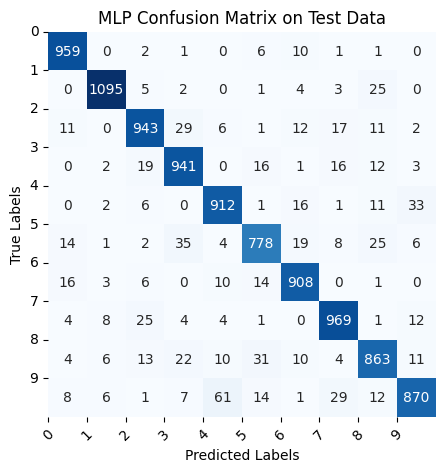

In [27]:
# plot mlp confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(mlp_cf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('MLP Confusion Matrix on Test Data')
plt.xticks(ticks=np.arange(len(labels_list)), labels=labels_list, rotation=45)
plt.yticks(ticks=np.arange(len(labels_list)), labels=labels_list, rotation=0)
plt.show()

# Comparison of performance metrics

In [28]:
import pandas as pd

# Create a dictionary to store the metrics
metrics_dict = {
    'Model': ['Accuracy', 'Loss', 'Precision', 'Recall'],
    'CNN': ['{:.2f}%'.format(cnn[1] * 100), cnn[0], cnn_precision, cnn_recall],
    'LSTM': ['{:.2f}%'.format(lstm_accuracy*100), lstm_loss, lstm_precision, lstm_recall],
    'MLP': ['{:.2f}%'.format(mlptest[1] * 100), mlptest[0], mlp_precision, mlp_recall],
}

metrics_df = pd.DataFrame(metrics_dict)

# Display the DataFrame
display(metrics_df)

,Model,CNN,LSTM,MLP
0,Accuracy,99.21%,98.38%,92.38%
1,Loss,0.028962,0.052123,0.258081
2,Precision,0.992111,0.983869,0.923826
3,Recall,0.9921,0.9838,0.9238


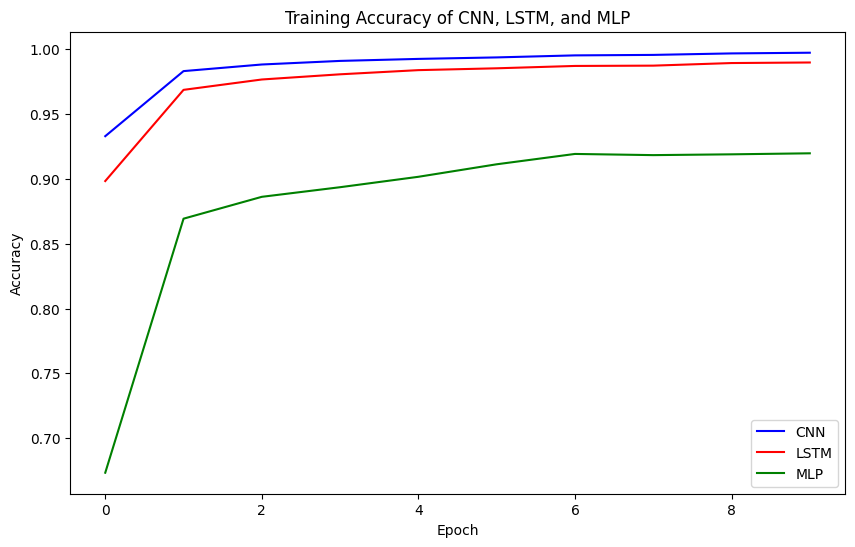

In [29]:
#plot training accuracy
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['accuracy'], label='CNN', color='blue')
lstm_accuracy_history_np = np.array(lstm_accuracy_history) / 100
plt.plot(lstm_accuracy_history_np, label='LSTM', color='red')
plt.plot(mlp_history.history['accuracy'], label='MLP', color='green')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of CNN, LSTM, and MLP')
plt.legend(loc='lower right')
plt.show()

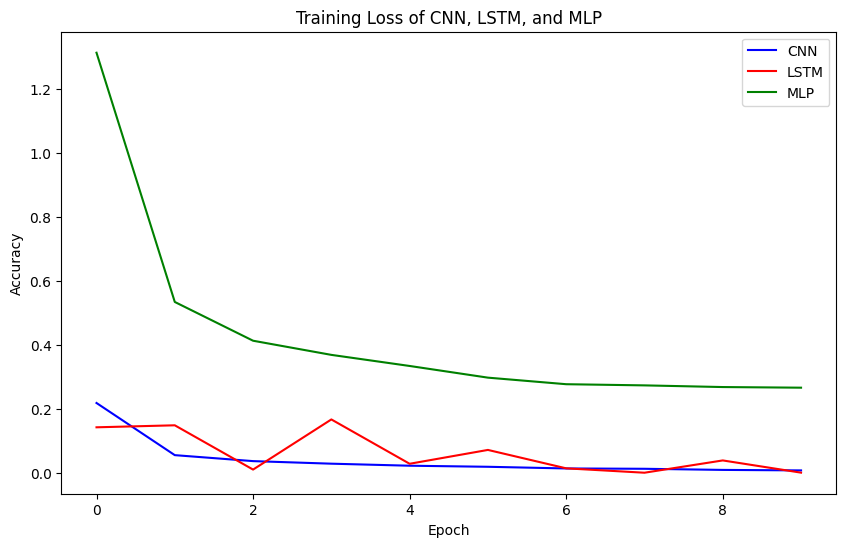

In [30]:
#plot training loss
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['loss'], label='CNN', color='blue')
plt.plot(lstm_loss_history, label='LSTM', color='red')
plt.plot(mlp_history.history['loss'], label='MLP', color='green')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Loss of CNN, LSTM, and MLP')
plt.legend(loc='upper right')
plt.show()